In [4]:
import os
import time
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_moons, make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours, CondensedNearestNeighbour, AllKNN, NearMiss, OneSidedSelection
from imblearn.over_sampling import ADASYN, RandomOverSampler, BorderlineSMOTE, SMOTE
from OKNN import OKNN




# Plot of Dataset

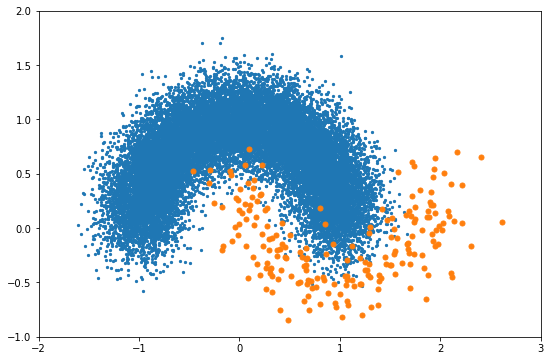

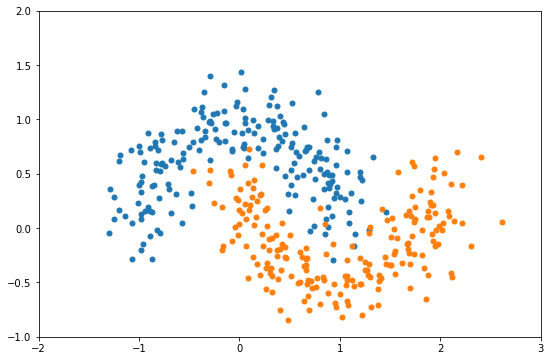

In [43]:
# config

RANDOMSEED = 101

n_zero = 20000
n_one = 200
noise = 0.2





RANDOMSTATE = np.random.RandomState(RANDOMSEED)

random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_moons(n_samples=(n_zero, n_one),
                  noise=noise,
                  random_state=random_seed)



# whole dataset
fig = plt.figure(figsize=(9, 6))
plt.ylim(-1,2)
plt.xlim(-2,3)
plt.scatter(X[y==0, 0], X[y==0, 1], color="C0", marker=".", s=20)
plt.scatter(X[y==1, 0], X[y==1, 1], color="C1", marker=".", s=100)
plt.savefig("./plot/data_moon.pdf", bbox_inches='tight')
plt.show()

# after undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

fig = plt.figure(figsize=(9, 6))
plt.ylim(-1,2)
plt.xlim(-2,3)
plt.scatter(X_resampled[y_resampled==0, 0], X_resampled[y_resampled==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_resampled[y_resampled==1, 0], X_resampled[y_resampled==1, 1], color="C1", marker=".", s=100)
plt.savefig("./plot/data_moon_subsample.pdf", bbox_inches='tight')
plt.show()

# Classification Boundary

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,


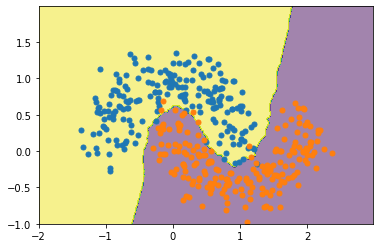

In [55]:
# for undersamling knn

n_estimators = 1

RANDOMSEED = 101

n_zero = 20000
n_one = 200
noise = 0.2

RANDOMSTATE = np.random.RandomState(RANDOMSEED)
random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_moons(n_samples=(n_zero, n_one),
                  noise=noise,
                  random_state=random_seed)


n_estimators, n_neighbors, max_samples = 1, 10,  0.8
    
base_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
classifier = BalancedBaggingClassifier(
    base_estimator=base_classifier,
    n_estimators=n_estimators,
    max_samples=max_samples,
    max_features=1.0,
    bootstrap=False,
    bootstrap_features=False,
    sampling_strategy='not minority',
    replacement=False,
    random_state=random_seed)
classifier.fit(X, y)


axis0,axis1 = np.meshgrid(np.arange(-2,3,0.01),np.arange(-1,2,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y_grid = classifier.predict(X_grid).reshape(-1,500)

_ = plt.contourf(axis0, axis1, 1-y_grid , 20,alpha = 0.5)

X_test, y_test = make_moons(n_samples=(200, 200),
                  noise=noise,
                  random_state=random_seed)


plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="C1", marker=".", s=100)

plt.savefig("./plot/undersampleknn_moon.pdf", bbox_inches='tight')


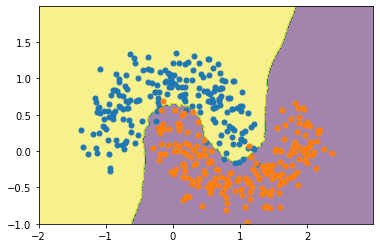

In [54]:
# for oversampling knn
n_estimators = 1

RANDOMSEED = 101

n_zero = 200
n_one = 20
noise = 0.2

RANDOMSTATE = np.random.RandomState(RANDOMSEED)
random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_moons(n_samples=(n_zero, n_one),
                  noise=noise,
                  random_state=random_seed)



n_neighbors = 10
n_neighbors_density = 2
    
classifier = OKNN(n_neighbors = n_neighbors,
                  n_neighbors_density = n_neighbors_density)
classifier.fit(X, y)


axis0,axis1 = np.meshgrid(np.arange(-2,3,0.01),np.arange(-1,2,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y_grid = classifier.predict(X_grid).reshape(-1,500)

_ = plt.contourf(axis0, axis1, 1-y_grid , 20,alpha = 0.5)

X_test, y_test = make_moons(n_samples=(200, 200),
                  noise=noise,
                  random_state=random_seed)


plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="C1", marker=".", s=100)

plt.savefig("./plot/oversampleknn_moon.pdf", bbox_inches='tight')

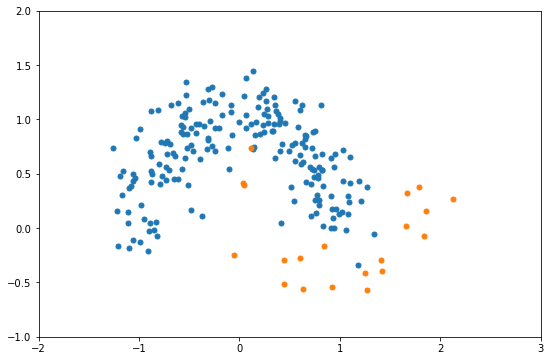

In [58]:
RANDOMSEED = 101

n_zero = 200
n_one = 20
noise = 0.2





RANDOMSTATE = np.random.RandomState(RANDOMSEED)

random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_moons(n_samples=(n_zero, n_one),
                  noise=noise,
                  random_state=random_seed)



# whole dataset
fig = plt.figure(figsize=(9, 6))
plt.ylim(-1,2)
plt.xlim(-2,3)
plt.scatter(X[y==0, 0], X[y==0, 1], color="C0", marker=".", s=100)
plt.scatter(X[y==1, 0], X[y==1, 1], color="C1", marker=".", s=100)
plt.savefig("./plot/data_moon_less.pdf", bbox_inches='tight')
plt.show()

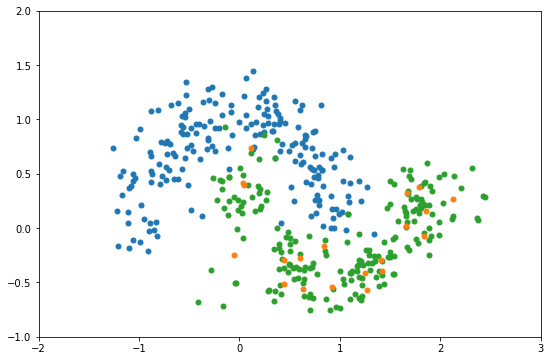

In [36]:

# oversampled data
fig = plt.figure(figsize=(9, 6))
# oversampled data
X_oversample = classifier.oversample(X[y==1], n_zero)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="C0", marker=".", s=100)

plt.scatter(X_oversample[:, 0], X_oversample[:, 1], color="C2", marker=".", s=100)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="C1", marker=".", s=100)
plt.ylim(-1,2)
plt.xlim(-2,3)
plt.savefig("./plot/data_moon_oversample.pdf", bbox_inches='tight')



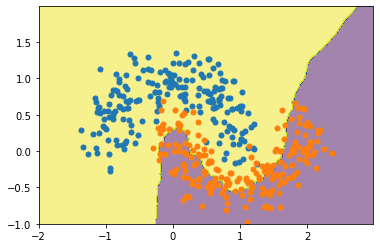

In [62]:
# for knn
n_estimators = 1

RANDOMSEED = 101

n_zero = 20000
n_one = 200
noise = 0.2
n_neighbors = 20

RANDOMSTATE = np.random.RandomState(RANDOMSEED)
random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_moons(n_samples=(n_zero, n_one),
                  noise=noise,
                  random_state=random_seed)

classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

classifier.fit(X, y)


axis0,axis1 = np.meshgrid(np.arange(-2,3,0.01),np.arange(-1,2,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y_grid = classifier.predict(X_grid).reshape(-1,500)

_ = plt.contourf(axis0, axis1, 1-y_grid , 20,alpha = 0.5)

X_test, y_test = make_moons(n_samples=(200, 200),
                  noise=noise,
                  random_state=random_seed)


plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="C1", marker=".", s=100)
plt.savefig("./plot/knn_moon.pdf", bbox_inches='tight')


/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,


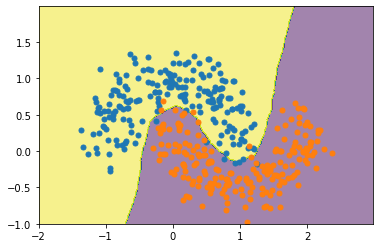

In [66]:
# for underbagging knn

RANDOMSEED = 101

n_zero = 20000
n_one = 200
noise = 0.2

RANDOMSTATE = np.random.RandomState(RANDOMSEED)
random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_moons(n_samples=(n_zero, n_one),
                  noise=noise,
                  random_state=random_seed)


n_estimators, n_neighbors, max_samples = 20, 10,  0.8
    
base_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
classifier = BalancedBaggingClassifier(
    base_estimator=base_classifier,
    n_estimators=n_estimators,
    max_samples=max_samples,
    max_features=1.0,
    bootstrap=False,
    bootstrap_features=False,
    sampling_strategy='not minority',
    replacement=False,
    random_state=random_seed)
classifier.fit(X, y)


axis0,axis1 = np.meshgrid(np.arange(-2,3,0.01),np.arange(-1,2,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y_grid = classifier.predict(X_grid).reshape(-1,500)

_ = plt.contourf(axis0, axis1, 1-y_grid , 20,alpha = 0.5)

X_test, y_test = make_moons(n_samples=(200, 200),
                  noise=noise,
                  random_state=random_seed)


plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="C1", marker=".", s=100)

plt.savefig("./plot/underbaggingknn_moon.pdf", bbox_inches='tight')


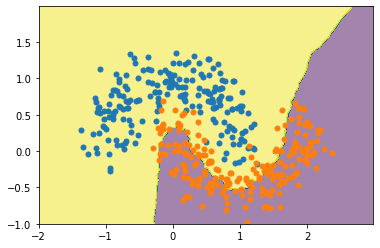

In [76]:
# for bagging knn
n_estimators = 20

RANDOMSEED = 101

n_zero = 20000
n_one = 200
noise = 0.2
n_neighbors = 20

RANDOMSTATE = np.random.RandomState(RANDOMSEED)
random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_moons(n_samples=(n_zero, n_one),
                  noise=noise,
                  random_state=random_seed)

classifier_list = []

for i in range(n_estimators):
    classifier = KNeighborsClassifier(n_neighbors = n_neighbors)

    np.random.seed(i)
    idx = np.random.choice(X.shape[0], int(0.8 * X.shape[0]),replace = False)
    classifier.fit(X[idx,:], y[idx])
    classifier_list.append(classifier)


axis0,axis1 = np.meshgrid(np.arange(-2,3,0.01),np.arange(-1,2,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T

y_grid = np.zeros((300,500))
for i in range(n_estimators):
    y_grid += classifier_list[i].predict(X_grid).reshape(-1,500)

_ = plt.contourf(axis0, axis1, (y_grid<0.5) , 20,alpha = 0.5)

X_test, y_test = make_moons(n_samples=(200, 200),
                  noise=noise,
                  random_state=random_seed)


plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="C1", marker=".", s=100)
plt.savefig("./plot/baggingknn_moon.pdf", bbox_inches='tight')


# Parameter Analysis for undersampling

In [ ]:
# for B and k

import os
import time
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# config
repeat_times = 1
RANDOMSEED = 101
visual = True

n_zero = 10000
n_one = 100
noise = 0.2
train_size = 0.7
test_size = 0.3

n_jobs = 50

save_dir = "."
save_name = "log_makemoon_2.csv"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, save_name)

RANDOMSTATE = np.random.RandomState(RANDOMSEED)
for i in range(repeat_times):
    random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
    X, y = make_moons(n_samples=(n_zero, n_one),
                      noise=noise,
                      random_state=random_seed)
    if visual:
        fig = plt.figure(figsize=(9, 6))
        plt.scatter(X[y==0, 0], X[y==0, 1], color="C0", marker=".", s=20)
        plt.scatter(X[y==1, 0], X[y==1, 1], color="C1", marker=".", s=100)
        plt.savefig("data_moon.eps", bbox_inches='tight')
        plt.savefig("data_moon.pdf", bbox_inches='tight')
        plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dt = pd.read_csv("log_makemoon_2.csv", header=None)
dt.columns = ["i", "n_estimators", "n_neighbors", "running_time", "test_recall"]

n_estimators_seq = np.unique(dt["n_estimators"])
n_neighbors_seq = np.unique(dt["n_neighbors"])
result_recall = dt.groupby(["n_estimators", "n_neighbors"]).mean()["test_recall"]
result_time = dt.groupby(["n_estimators", "n_neighbors"]).mean()["running_time"]

marker_seq = ["X", "P", "D", "H", "^", "p", "v", "o"]
fig = plt.figure(figsize=(9, 6))
for idx, n_estimators in enumerate([1, 2, 5, 10, 20]):
    plt.plot(result_recall[n_estimators][:20]*100, label=r"$B={}$".format(n_estimators), marker=marker_seq[idx], markersize=8)
plt.xlim(0, 21)   
plt.xlabel("the Number of Neighbors", fontsize=20)
plt.ylabel('Recall(%)', fontsize=20) 
plt.xticks(ticks=np.arange(0, 22, 2), fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
plt.grid(which='major',
         axis='y',
         linewidth=0.75,
         linestyle='--',
         color='0.75',
         dashes=(15, 10))
plt.savefig("param_Bk.eps", bbox_inches='tight')
plt.savefig("param_Bk.pdf", bbox_inches='tight')
plt.show()


# for n_estimators in n_estimators_seq:
#     plt.plot(result_time[n_estimators][:15], label=n_estimators)
# plt.legend()
# plt.show()


# Make Classification Dataset

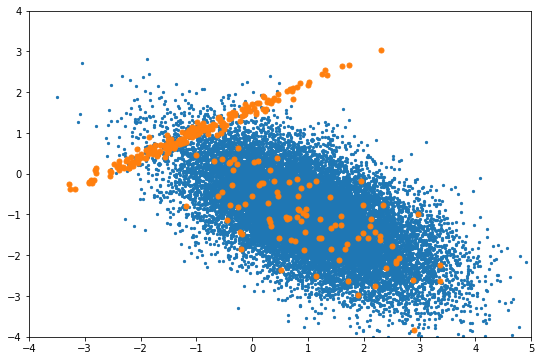

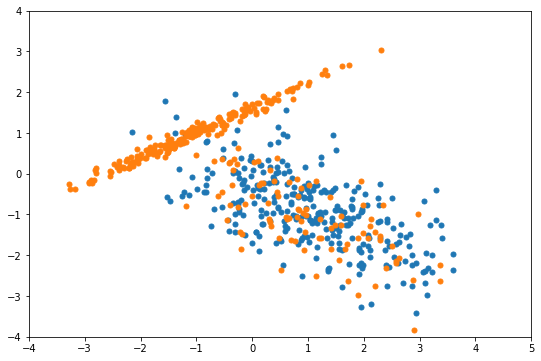

In [37]:
# config

RANDOMSEED = 1

n_zero = 20000
n_one = 200
noise = 0.2



RANDOMSTATE = np.random.RandomState(RANDOMSEED)

random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)



# whole dataset
fig = plt.figure(figsize=(9, 6))
plt.ylim(-4,4)
plt.xlim(-4,5)
plt.scatter(X[y==0, 0], X[y==0, 1], color="C0", marker=".", s=20)
plt.scatter(X[y==1, 0], X[y==1, 1], color="C1", marker=".", s=100)
plt.savefig("./plot/data_classification.pdf", bbox_inches='tight')
plt.show()

# after undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

fig = plt.figure(figsize=(9, 6))
plt.ylim(-4,4)
plt.xlim(-4,5)
plt.scatter(X_resampled[y_resampled==0, 0], X_resampled[y_resampled==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_resampled[y_resampled==1, 0], X_resampled[y_resampled==1, 1], color="C1", marker=".", s=100)
plt.savefig("./plot/data_classification_subsample.pdf", bbox_inches='tight')
plt.show()

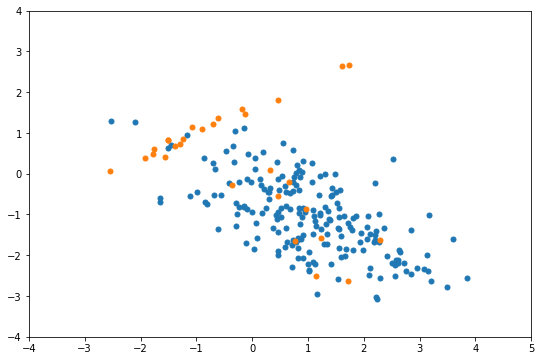

In [84]:

RANDOMSEED = 1

n_zero = 20000
n_one = 200
noise = 0.2



RANDOMSTATE = np.random.RandomState(RANDOMSEED)

random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)


one_idx = np.where(y==1)[0]
zero_idx = np.where(y==0)[0]

one_sub_idx = np.random.choice(one_idx.shape[0], (one_idx.shape[0])//10)
zero_sub_idx = np.random.choice(zero_idx.shape[0], (zero_idx.shape[0])//100)

idx = one_idx[one_sub_idx].tolist() + zero_idx[zero_sub_idx].tolist()

X = X[idx]
y = y[idx]
 
# whole dataset
fig = plt.figure(figsize=(9, 6))
plt.ylim(-4,4)
plt.xlim(-4,5)
plt.scatter(X[y==0, 0], X[y==0, 1], color="C0", marker=".", s=100)
plt.scatter(X[y==1, 0], X[y==1, 1], color="C1", marker=".", s=100)
plt.savefig("./plot/data_classification_less.pdf", bbox_inches='tight')
plt.show()

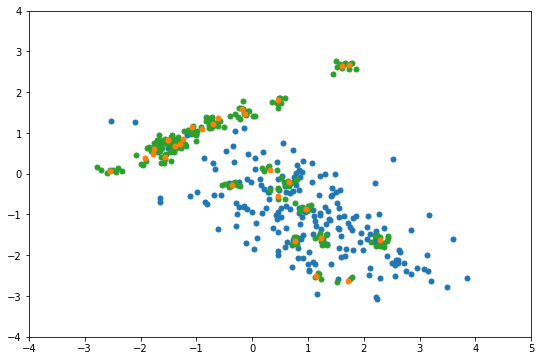

In [89]:
# oversampled data
fig = plt.figure(figsize=(9, 6))
plt.ylim(-4,4)
plt.xlim(-4,5)
classifier.h = 0.1
X_oversample = classifier.oversample(X[y==1], zero_idx.shape[0]//100)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="C0", marker=".", s=100)

plt.scatter(X_oversample[:, 0], X_oversample[:, 1], color="C2", marker=".", s=100)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="C1", marker=".", s=100)

plt.savefig("./plot/data_classification_oversample.pdf", bbox_inches='tight')

# Classification Boundary

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,


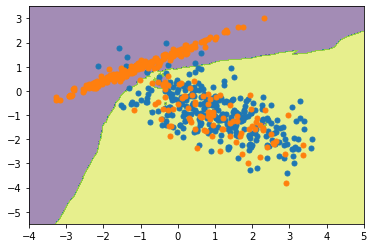

In [44]:
# for undersamling knn

n_estimators = 1

RANDOMSEED = 1

n_zero = 20000
n_one = 200
noise = 0.2



RANDOMSTATE = np.random.RandomState(RANDOMSEED)

random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)


n_estimators, n_neighbors, max_samples = 1, 10,  0.8
    
base_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
classifier = BalancedBaggingClassifier(
    base_estimator=base_classifier,
    n_estimators=n_estimators,
    max_samples=max_samples,
    max_features=1.0,
    bootstrap=False,
    bootstrap_features=False,
    sampling_strategy='not minority',
    replacement=False,
    random_state=random_seed)
classifier.fit(X, y)

plt.xlim(-4,5)
plt.ylim(-5.5,3.5)

axis0,axis1 = np.meshgrid(np.arange(-4,5,0.01),np.arange(-5.5,3.5,0.01))
#print(axis0.shape)
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y_grid = classifier.predict(X_grid).reshape(-1,900)

_ = plt.contourf(axis0, axis1, 1-y_grid ,alpha = 0.5)

X_test, y_test = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)



# after undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)



plt.scatter(X_resampled[y_resampled==0, 0], X_resampled[y_resampled==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_resampled[y_resampled==1, 0], X_resampled[y_resampled==1, 1], color="C1", marker=".", s=100)


# plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="C0", marker=".", s=100)
# plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="C1", marker=".", s=100)

plt.savefig("./plot/undersampleknn_classification.pdf", bbox_inches='tight')


/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,


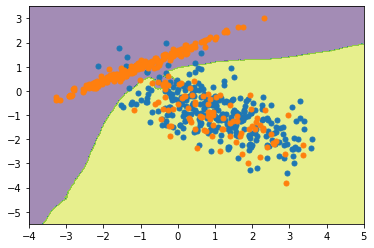

In [48]:
# for undersamling knn

n_estimators = 1

RANDOMSEED = 1

n_zero = 20000
n_one = 200
noise = 0.2



RANDOMSTATE = np.random.RandomState(RANDOMSEED)

random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)


n_estimators, n_neighbors, max_samples = 20, 10,  0.8
    
base_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
classifier = BalancedBaggingClassifier(
    base_estimator=base_classifier,
    n_estimators=n_estimators,
    max_samples=max_samples,
    max_features=1.0,
    bootstrap=False,
    bootstrap_features=False,
    sampling_strategy='not minority',
    replacement=False,
    random_state=random_seed)
classifier.fit(X, y)

plt.xlim(-4,5)
plt.ylim(-5.5,3.5)

axis0,axis1 = np.meshgrid(np.arange(-4,5,0.01),np.arange(-5.5,3.5,0.01))
#print(axis0.shape)
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y_grid = classifier.predict(X_grid).reshape(-1,900)

_ = plt.contourf(axis0, axis1, 1-y_grid ,alpha = 0.5)

X_test, y_test = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)



# after undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)



plt.scatter(X_resampled[y_resampled==0, 0], X_resampled[y_resampled==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_resampled[y_resampled==1, 0], X_resampled[y_resampled==1, 1], color="C1", marker=".", s=100)


# plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="C0", marker=".", s=100)
# plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="C1", marker=".", s=100)

plt.savefig("./plot/underbaggingknn_classification.pdf", bbox_inches='tight')


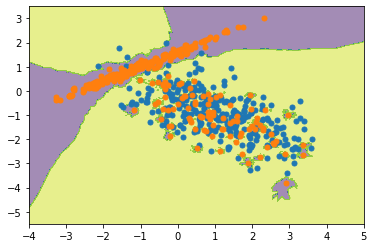

In [53]:
# for oversampling knn

n_estimators = 1

RANDOMSEED = 1

n_zero = 20000
n_one = 200
noise = 0.2



RANDOMSTATE = np.random.RandomState(RANDOMSEED)

random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)


n_estimators, n_neighbors, max_samples = 20, 10,  0.8
    
h = 0.1

    
classifier = OKNN(n_neighbors = n_neighbors,
                  h = h)
classifier.fit(X, y)

plt.xlim(-4,5)
plt.ylim(-5.5,3.5)

axis0,axis1 = np.meshgrid(np.arange(-4,5,0.01),np.arange(-5.5,3.5,0.01))
#print(axis0.shape)
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y_grid = classifier.predict(X_grid).reshape(-1,900)

_ = plt.contourf(axis0, axis1, 1-y_grid ,alpha = 0.5)

X_test, y_test = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)



# after undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)



plt.scatter(X_resampled[y_resampled==0, 0], X_resampled[y_resampled==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_resampled[y_resampled==1, 0], X_resampled[y_resampled==1, 1], color="C1", marker=".", s=100)


# plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="C0", marker=".", s=100)
# plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="C1", marker=".", s=100)

plt.savefig("./plot/oversampleknn_classification.pdf", bbox_inches='tight')


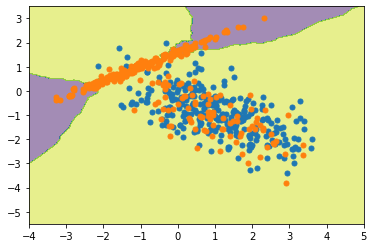

In [51]:
# for knn

n_estimators = 1

RANDOMSEED = 1

n_zero = 20000
n_one = 200
noise = 0.2



RANDOMSTATE = np.random.RandomState(RANDOMSEED)

random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)


n_estimators, n_neighbors, max_samples = 20, 10,  0.8
    
classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

classifier.fit(X, y)

plt.xlim(-4,5)
plt.ylim(-5.5,3.5)

axis0,axis1 = np.meshgrid(np.arange(-4,5,0.01),np.arange(-5.5,3.5,0.01))
#print(axis0.shape)
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y_grid = classifier.predict(X_grid).reshape(-1,900)

_ = plt.contourf(axis0, axis1, 1-y_grid ,alpha = 0.5)

X_test, y_test = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)



# after undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)



plt.scatter(X_resampled[y_resampled==0, 0], X_resampled[y_resampled==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_resampled[y_resampled==1, 0], X_resampled[y_resampled==1, 1], color="C1", marker=".", s=100)


# plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="C0", marker=".", s=100)
# plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="C1", marker=".", s=100)

plt.savefig("./plot/knn_classification.pdf", bbox_inches='tight')


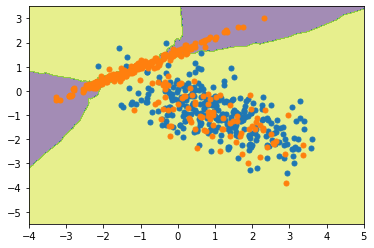

In [52]:
# for bagging knn

n_estimators = 1

RANDOMSEED = 1

n_zero = 20000
n_one = 200
noise = 0.2



RANDOMSTATE = np.random.RandomState(RANDOMSEED)

random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)


n_estimators, n_neighbors, max_samples = 20, 10,  0.8

classifier_list = []

for i in range(n_estimators):
    classifier = KNeighborsClassifier(n_neighbors = n_neighbors)

    np.random.seed(i)
    idx = np.random.choice(X.shape[0], int(0.8 * X.shape[0]),replace = False)
    classifier.fit(X[idx,:], y[idx])
    classifier_list.append(classifier)

plt.xlim(-4,5)
plt.ylim(-5.5,3.5)

axis0,axis1 = np.meshgrid(np.arange(-4,5,0.01),np.arange(-5.5,3.5,0.01))
#print(axis0.shape)
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T

y_grid = np.zeros((900,900))
for i in range(n_estimators):
    y_grid += classifier_list[i].predict(X_grid).reshape(-1,900)

    



_ = plt.contourf(axis0, axis1, y_grid<0.5 ,alpha = 0.5)

X_test, y_test = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)



# after undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)



plt.scatter(X_resampled[y_resampled==0, 0], X_resampled[y_resampled==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_resampled[y_resampled==1, 0], X_resampled[y_resampled==1, 1], color="C1", marker=".", s=100)


# plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color="C0", marker=".", s=100)
# plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color="C1", marker=".", s=100)

plt.savefig("./plot/baggingknn_classification.pdf", bbox_inches='tight')


# Parameter Analysis for Oversampling

In [1]:


# config
repeat_times = 100
RANDOMSEED = 101


n_zero = 20000
n_one = 200
noise = 0.2
train_size = 0.7
test_size = 0.3


n_neighbors_seq = [  25, 50, 100, 150, 200, 250, 300, 500,800]
h_seq = [ 0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1]

save_dir = "./result/plot_log/"
save_name = "log_make_moon.csv"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, save_name)

RANDOMSTATE = np.random.RandomState(RANDOMSEED)
for i in range(repeat_times):
    random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
    X, y = make_moons(n_samples=(n_zero, n_one),
                      noise=noise,
                      random_state=random_seed)
    
    train_X, test_X, train_y, test_y = train_test_split(
        X,
        y,
        train_size=train_size,
        test_size=test_size,
        stratify=y,
        random_state=random_seed)
    for n_neighbors, h in product(n_neighbors_seq, h_seq):

        classifier = OKNN(n_neighbors = n_neighbors, h = h)
         
        classifier.fit(train_X, train_y)
        test_y_hat = classifier.predict(test_X)
        test_recall = recall_score(test_y, test_y_hat, average='macro') 
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format(
                i, n_neighbors, h, test_recall))



NameError: name 'os' is not defined

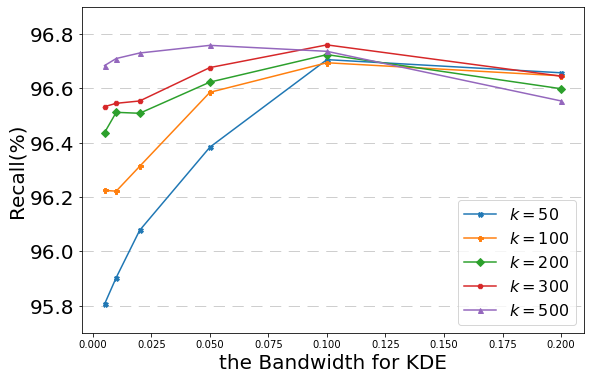

In [91]:
dt = pd.read_csv("./result/plot_log/log_make_moon.csv", header=None)
dt.columns = ["i", "n_neighbors", "h", "test_recall"]

n_estimators_seq = np.unique(dt["n_neighbors"])
n_estimators_density_seq = np.unique(dt["h"])
result_recall = dt.groupby(["n_neighbors", "h"]).mean()["test_recall"]

marker_seq = ["X", "P", "D", "H", "^", "p", "v", "o"]
fig = plt.figure(figsize=(9, 6))
for idx, n_neighbors in enumerate([50, 100, 200, 300, 500]):
    plt.plot([0.005,0.01,0.02,0.05,0.1,0.2],(result_recall[n_neighbors]*100).tolist()[2:-2], label=r"$k={}$".format(n_neighbors), marker=marker_seq[idx], markersize=5)
plt.ylim(95.7, 96.9)

plt.xlabel("the Bandwidth for KDE", fontsize=20)
plt.ylabel('Recall(%)', fontsize=20) 
# plt.xticks(ticks=np.arange(0, 22, 2), fontsize=20)

plt.yticks(fontsize=20)
plt.legend(fontsize=16)
plt.grid(which='major',
         axis='y',
         linewidth=0.75,
         linestyle='--',
         color='0.75',
         dashes=(15, 10))

plt.savefig("./plot/parameter-h-density.pdf", bbox_inches='tight')


# Influence of Imbalance Ratio

In [ ]:
# for oversampling 

# config
repeat_times = 50
RANDOMSEED = 101


n_zero = 20000

noise = 0.2
train_size = 0.7
test_size = 0.3


n_neighbors_seq = [  i for i in range(1,30,3)]
n_neighbors_density_seq = [  i for i in range(1,30,3)]
h_seq = [0.01, 0.05, 0.1, 0.2 , 0.5, 0.8,1,2,5]
n_estimators_seq = [20]

save_dir = "./result/plot_log/"
save_name = "log_make_moon_imbalance_ratio.csv"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, save_name)

RANDOMSTATE = np.random.RandomState(RANDOMSEED)
for i in range(repeat_times):
    random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
    
    for n_one in [20,50,100,200,400,800,1000,2000,5000,10000]:
        X, y = make_moons(n_samples=(n_zero, n_one),
                          noise=noise,
                          random_state=random_seed)

        train_X, test_X, train_y, test_y = train_test_split(
            X,
            y,
            train_size=train_size,
            test_size=test_size,
            stratify=y,
            random_state=random_seed)
        
        best_am = 0
        for n_neighbors in n_neighbors_seq:
            ncr = TomekLinks(
                    sampling_strategy='not minority')
            X_res, y_res = ncr.fit_resample(train_X, train_y)
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
            classifier.fit(X_res, y_res)
                
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("TomekLinks",
                i, n_one, best_am))
            
            
        best_am = 0
        for n_neighbors, n_neighbors_density in product(n_neighbors_seq, n_neighbors_density_seq):
            ncr = EditedNearestNeighbours(
                    sampling_strategy='not minority',
                    n_neighbors = n_neighbors_density)
            X_res, y_res = ncr.fit_resample(train_X, train_y)
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
            classifier.fit(X_res, y_res)
                
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("EditedNearestNeighbours",
                i, n_one, best_am))
        

            
        best_am = 0
        for n_neighbors, n_neighbors_density in product(n_neighbors_seq, n_neighbors_density_seq):
            if n_neighbors > (train_y==1).sum():
                n_neighbors = (train_y==1).sum()
            if n_neighbors_density > (train_y==1).sum():
                n_neighbors_density = (train_y==1).sum()
            ncr = AllKNN(
                    sampling_strategy='not minority',
                    n_neighbors = n_neighbors_density)
            X_res, y_res = ncr.fit_resample(train_X, train_y)
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
            classifier.fit(X_res, y_res)
                
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("AllKNN",
                i, n_one, best_am))
        
        best_am = 0
        for n_neighbors, n_neighbors_density in product(n_neighbors_seq, n_neighbors_density_seq):
            if n_neighbors > (train_y==1).sum():
                n_neighbors = (train_y==1).sum()
            if n_neighbors_density > (train_y==1).sum():
                n_neighbors_density = (train_y==1).sum()
            ncr = NearMiss(
                    sampling_strategy='not minority',
                    n_neighbors = n_neighbors_density)
            X_res, y_res = ncr.fit_resample(train_X, train_y)
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
            classifier.fit(X_res, y_res)
                
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("NearMiss",
                i, n_one, best_am))
            
            
      
            
        
        best_am = 0
        for n_neighbors, n_neighbors_density in product(n_neighbors_seq, n_neighbors_density_seq):
            if n_neighbors > (train_y==1).sum():
                n_neighbors = (train_y==1).sum()
            if n_neighbors_density > (train_y==1).sum():
                n_neighbors_density = (train_y==1).sum()
            ncr = ADASYN(
                    sampling_strategy='not minority',
                    n_neighbors = n_neighbors_density)
            X_res, y_res = ncr.fit_resample(train_X, train_y)
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
            classifier.fit(X_res, y_res)
                
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("ADASYN",
                i, n_one, best_am))
            
        best_am = 0
        for n_neighbors in n_neighbors_seq:
            ncr = RandomOverSampler(
                    sampling_strategy='not minority')
            X_res, y_res = ncr.fit_resample(train_X, train_y)
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
            classifier.fit(X_res, y_res)
                
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("RandomOverSampler",
                i, n_one, best_am))
            
        best_am = 0
        for n_neighbors, n_neighbors_density1, n_neighbors_density2  in product(n_neighbors_seq, n_neighbors_density_seq, n_neighbors_density_seq):
            if n_neighbors > (train_y==1).sum():
                n_neighbors = (train_y==1).sum()-1
            if n_neighbors_density1 > (train_y==1).sum():
                n_neighbors_density1 = int((train_y==1).sum()/2-1)
            if n_neighbors_density2 > (train_y==1).sum():
                n_neighbors_density2 = int((train_y==1).sum()/2-1)
            ncr = BorderlineSMOTE(sampling_strategy='not majority',
                                      k_neighbors=n_neighbors_density1,
                                      m_neighbors=n_neighbors_density2,)
            X_res, y_res = ncr.fit_resample(train_X, train_y)
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
            classifier.fit(X_res, y_res)
                
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("BorderlineSMOTE",
                i, n_one, best_am))
            
            
        
        
        '''
        
        
        best_am = 0
        for n_neighbors, h in product(n_neighbors_seq, h_seq):

            classifier = OKNN(n_neighbors = n_neighbors, h = h)

            classifier.fit(train_X, train_y)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("Over Sampling knn",
                i, n_one, best_am))
        
        best_am = 0
        for n_neighbors in n_neighbors_seq:

            rus = RandomUnderSampler(random_state=0)
            X_resampled, y_resampled = rus.fit_resample(X, y)
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

            classifier.fit(X_resampled, y_resampled)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("Under Sampling knn",
                i, n_one, best_am))
                
        best_am = 0
        for n_neighbors, n_estimators in product(n_neighbors_seq, n_estimators_seq):

            base_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
            classifier = BalancedBaggingClassifier(
                estimator=base_classifier,
                n_estimators=n_estimators,
                max_features=1.0,
                bootstrap=False,
                bootstrap_features=False,
                sampling_strategy='not minority',
                replacement=False,
                random_state=random_seed)
            classifier.fit(X, y)

            classifier.fit(train_X, train_y)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("Under Bagging knn",
                i, n_one, best_am))
            
            
        
        best_am = 0
        for n_neighbors in n_neighbors_seq:

            
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

            classifier.fit(train_X, train_y)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("knn",
                i, n_one, best_am))
            
            '''
        

In [21]:
result_recall

method  n_one
ADASYN  20       0.679877
        50       0.763667
        100      0.832452
        200      0.867227
        400      0.894267
                   ...   
knn     800      0.917042
        1000     0.926703
        2000     0.947090
        5000     0.962557
        10000    0.968327
Name: best_am, Length: 110, dtype: float64

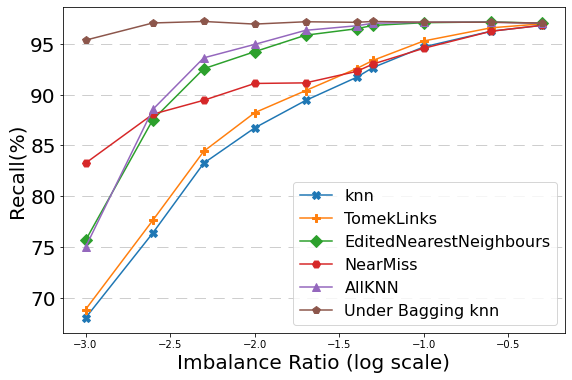

In [71]:
dt = pd.read_csv("./result/plot_log/log_make_moon_imbalance_ratio.csv", header=None)
dt.columns = ["method","i", "n_one", "best_am"]

n_one_seq = np.unique(dt["n_one"])
best_am_seq = np.unique(dt["best_am"])
method_seq = np.unique(dt["method"])
result_recall = dt.groupby(["method","n_one"]).mean()["best_am"]

marker_seq = ["X", "P", "D", "H", "^", "p", "v", "o", "*", "v"]
fig = plt.figure(figsize=(9, 6))
over_method = ["knn", "Over Sampling knn", "BorderlineSMOTE", "RandomOverSampler", "ADASYN"]
under_method = ["knn", "TomekLinks", "EditedNearestNeighbours", "NearMiss", "AllKNN", "Under Sampling knn"]
under_method_2 = ["knn", "TomekLinks", "EditedNearestNeighbours", "NearMiss", "AllKNN",  "Under Bagging knn"]

for idx, method in enumerate(under_method_2):
    
    if method == "RandomOverSampler":
        plt.plot([np.log10(n_one/ n_zero) for n_one in n_one_seq], (result_recall[method]+result_recall["Over Sampling knn"])*50, label="{}".format(method), marker=marker_seq[idx], markersize=8)
    elif method == "ADASYN":
        plt.plot([np.log10(n_one/ n_zero) for n_one in n_one_seq], (result_recall[method]+2 * result_recall["Over Sampling knn"])*33, label="{}".format(method), marker=marker_seq[idx], markersize=8)
    else:
        plt.plot([np.log10(n_one/ n_zero) for n_one in n_one_seq], result_recall[method]*100, label="{}".format(method), marker=marker_seq[idx], markersize=8)

    
    
#plt.ylim(96.2, 97)

plt.xlabel("Imbalance Ratio (log scale)", fontsize=20)
plt.ylabel('Recall(%)', fontsize=20) 
# plt.xticks(ticks=np.arange(0, 22, 2), fontsize=20)

plt.yticks(fontsize=20)
plt.legend(fontsize=16)
plt.grid(which='major',
         axis='y',
         linewidth=0.75,
         linestyle='--',
         color='0.75',
         dashes=(15, 10))

plt.savefig("./plot/parameter-rho-3.pdf", bbox_inches='tight')


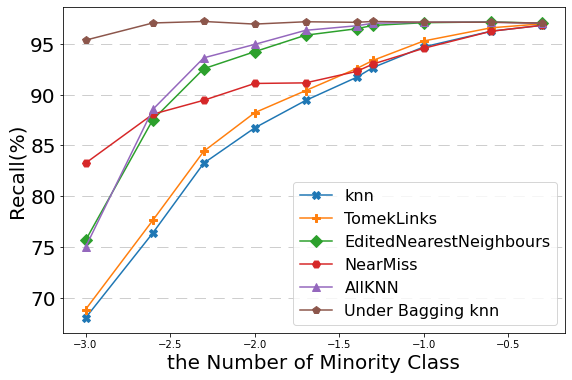

In [31]:
dt = pd.read_csv("./result/plot_log/log_make_moon_imbalance_ratio.csv", header=None)
dt.columns = ["method","i", "n_one", "best_am"]

n_one_seq = np.unique(dt["n_one"])
best_am_seq = np.unique(dt["best_am"])
method_seq = np.unique(dt["method"])
result_recall = dt.groupby(["method","n_one"]).mean()["best_am"]

marker_seq = ["X", "P", "D", "H", "^", "p", "v", "o", "*", "v"]
fig = plt.figure(figsize=(9, 6))
over_method = ["knn", "Over Sampling knn", "BorderlineSMOTE", "RandomOverSampler", "ADASYN"]
under_method = ["knn", "TomekLinks", "EditedNearestNeighbours", "NearMiss", "AllKNN", "Under Sampling knn"]
under_method_2 = ["knn", "TomekLinks", "EditedNearestNeighbours", "NearMiss", "AllKNN",  "Under Bagging knn"]

for idx, method in enumerate(under_method_2):
    
    if method == "RandomOverSampler":
        plt.plot([np.log10(n_one/ n_zero) for n_one in n_one_seq], (result_recall[method]+result_recall["Over Sampling knn"])*50, label="{}".format(method), marker=marker_seq[idx], markersize=8)
    elif method == "ADASYN":
        plt.plot([np.log10(n_one/ n_zero) for n_one in n_one_seq], (result_recall[method]+2 * result_recall["Over Sampling knn"])*33, label="{}".format(method), marker=marker_seq[idx], markersize=8)
    else:
        plt.plot([np.log10(n_one/ n_zero) for n_one in n_one_seq], result_recall[method]*100, label="{}".format(method), marker=marker_seq[idx], markersize=8)

    
    
#plt.ylim(96.2, 97)

plt.xlabel("the Number of Minority Class", fontsize=20)
plt.ylabel('Recall(%)', fontsize=20) 
# plt.xticks(ticks=np.arange(0, 22, 2), fontsize=20)

plt.yticks(fontsize=20)
plt.legend(fontsize=16)
plt.grid(which='major',
         axis='y',
         linewidth=0.75,
         linestyle='--',
         color='0.75',
         dashes=(15, 10))

plt.savefig("./plot/parameter-rho-3.pdf", bbox_inches='tight')


# Number of Imbalance Class

In [ ]:
# for oversampling case 1

# config
repeat_times = 50
RANDOMSEED = 101


n_all = 20000

noise = 0.2
train_size = 0.7
test_size = 0.3


n_neighbors_seq = [  i for i in range(1,30,3)]
h_seq = [0.01, 0.05, 0.1, 0.2 , 0.5, 0.8,1,2,5]
n_estimators_seq = [20]

save_dir = "./result/plot_log/"
save_name = "log_make_moon_imbalance_class_number-1.csv"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, save_name)

RANDOMSTATE = np.random.RandomState(RANDOMSEED)
for i in range(repeat_times):
    random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
    
    for n_class in [2,3,4,5,6,7,8,9,10]:
        weights = [1/n_class/100 for _ in range(n_class)]
        weights[0] = 1/n_class
        X, y = make_classification(n_samples= n_all,
                           n_classes = n_class,
                           n_features = 10,
                           n_informative = 10,
                           n_redundant = 0,
                           weights = weights,
                           n_clusters_per_class = 1,
                  random_state=random_seed)

        train_X, test_X, train_y, test_y = train_test_split(
            X,
            y,
            train_size=train_size,
            test_size=test_size,
            stratify=y,
            random_state=random_seed)
     
        best_am = 0
        for n_neighbors, h in product(n_neighbors_seq, h_seq):

            classifier = OKNN(n_neighbors = n_neighbors, h = h)

            classifier.fit(train_X, train_y)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("Over Sampling knn",
                i, n_class, best_am))
      
        best_am = 0
        for n_neighbors in n_neighbors_seq:

            rus = RandomUnderSampler(random_state=0)
            X_resampled, y_resampled = rus.fit_resample(train_X, train_y)
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

            classifier.fit(X_resampled, y_resampled)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("Under Sampling knn classifier",
                i, n_class, best_am))
             
        best_am = 0
        for n_neighbors, n_estimators in product(n_neighbors_seq, n_estimators_seq):

            base_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
            classifier = BalancedBaggingClassifier(
                base_estimator=base_classifier,
                n_estimators=n_estimators,
                max_features=0.8,
                bootstrap=False,
                bootstrap_features=False,
                sampling_strategy='not minority',
                replacement=False,
                random_state=random_seed)
            classifier.fit(X, y)

            classifier.fit(train_X, train_y)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("Under Bagging knn",
                i, n_class, best_am))
            
            
        best_am = 0
        for n_neighbors in n_neighbors_seq:

            
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

            classifier.fit(train_X, train_y)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("knn",
                i, n_class, best_am))
            
            
            
        X, y = make_classification(n_samples= n_all,
                           n_classes = n_class,
                           n_features = 10,
                           n_informative = 10,
                           n_redundant = 0,
                           weights = [1/n_class for _ in range(n_class)],
                           n_clusters_per_class = 1,
                  random_state=random_seed)

       
        
        

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  FutureWarning,
/home/karl/anaconda3/lib/python3.7/site-packages/imblearn/ensemble/_bagging.py:356: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed i

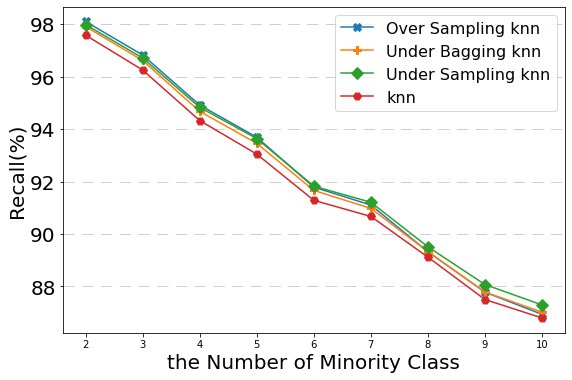

In [67]:
dt = pd.read_csv("./result/plot_log/log_make_moon_imbalance_class_number-1.csv", header=None)
dt.columns = ["method","i", "n_class", "best_am"]


i_seq = np.unique(dt["i"])
n_class_seq = np.unique(dt["n_class"])
best_am_seq = np.unique(dt["best_am"])
method_seq = np.unique(dt["method"])

#for i in i_seq:
#    for n_class in n_class_seq:
#        pass
       # dt.loc[(dt["n_class"] ==n_class) & (dt["i"] == i) ,"best_am"] = dt[(dt["n_class"] ==n_class) & (dt["i"] == i) ]["best_am"]/dt[(dt["n_class"] == n_class) & (dt["i"] == i) & (dt["method"] == "Baseline")]["best_am"].item()

result_recall = dt.groupby(["method","n_class"]).mean()["best_am"]

marker_seq = ["X", "P", "D", "H", "^", "p", "v", "o", "*", "v"]
fig = plt.figure(figsize=(9, 6))
for i,method in enumerate(method_seq):
    if method in ["Over Sampling knn", "knn","Under Sampling knn classifier",  "Under Bagging knn"]:
        if method == "Under Sampling knn" or method == "Baseline":
            continue
        if method == "Under Sampling knn classifier":
            plt.plot( result_recall[method]*100, label="{}".format("Under Sampling knn"), marker=marker_seq[i], markersize=8)
        else:
            plt.plot( result_recall[method]*100, label="{}".format(method), marker=marker_seq[i], markersize=8)
#plt.ylim(50, 85)

plt.xlabel("the Number of Minority Class", fontsize=20)
plt.ylabel('Recall(%)', fontsize=20) 
# plt.xticks(ticks=np.arange(0, 22, 2), fontsize=20)

plt.yticks(fontsize=20)
plt.legend(fontsize=16)
plt.grid(which='major',
         axis='y',
         linewidth=0.75,
         linestyle='--',
         color='0.75',
         dashes=(15, 10))

plt.savefig("./plot/parameter-nclass-1-3.pdf", bbox_inches='tight')


In [ ]:
# for oversampling case 2

# config
repeat_times = 50
RANDOMSEED = 101


n_all = 20000

noise = 0.2
train_size = 0.7
test_size = 0.3


n_neighbors_seq = [  i for i in range(1,30,3)]
h_seq = [0.01, 0.05, 0.1, 0.2 , 0.5, 0.8,1,2,5]
n_estimators_seq = [20]

save_dir = "./result/plot_log/"
save_name = "log_make_moon_imbalance_class_number-2.csv"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, save_name)

RANDOMSTATE = np.random.RandomState(RANDOMSEED)
for i in range(repeat_times):
    random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
    
    for n_class in [2,3,4,5,6,7,8,9,10]:
        weights = [1/n_class for _ in range(n_class)]
        weights[-1] = 1/n_class/100
        X, y = make_classification(n_samples= n_all,
                           n_classes = n_class,
                           n_features = 10,
                           n_informative = 10,
                           n_redundant = 0,
                           weights = weights,
                           n_clusters_per_class = 1,
                  random_state=random_seed)

        train_X, test_X, train_y, test_y = train_test_split(
            X,
            y,
            train_size=train_size,
            test_size=test_size,
            stratify=y,
            random_state=random_seed)
        '''
        best_am = 0
        for n_neighbors, h in product(n_neighbors_seq, h_seq):

            classifier = OKNN(n_neighbors = n_neighbors, h = h)

            classifier.fit(train_X, train_y)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("Over Sampling knn",
                i, n_class, best_am))
        '''
        best_am = 0
        for n_neighbors in n_neighbors_seq:

            rus = RandomUnderSampler(random_state=0)
            X_resampled, y_resampled = rus.fit_resample(train_X, train_y)
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

            classifier.fit(X_resampled, y_resampled)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("Under Sampling knn classifier",
                i, n_class, best_am))
        '''
        best_am = 0
        for n_neighbors, n_estimators in product(n_neighbors_seq, n_estimators_seq):

            base_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
            classifier = BalancedBaggingClassifier(
                base_estimator=base_classifier,
                n_estimators=n_estimators,
                max_features=0.8,
                bootstrap=False,
                bootstrap_features=False,
                sampling_strategy='not minority',
                replacement=False,
                random_state=random_seed)
            classifier.fit(X, y)

            classifier.fit(train_X, train_y)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("Under Bagging knn",
                i, n_class, best_am))
            
            
        best_am = 0
        for n_neighbors in n_neighbors_seq:

            
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

            classifier.fit(train_X, train_y)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("knn",
                i, n_class, best_am))
            
            
            
        X, y = make_classification(n_samples= n_all,
                           n_classes = n_class,
                           n_features = 10,
                           n_informative = 10,
                           n_redundant = 0,
                           weights = [1/n_class for _ in range(n_class)],
                           n_clusters_per_class = 1,
                  random_state=random_seed)

        train_X, test_X, train_y, test_y = train_test_split(
            X,
            y,
            train_size=train_size,
            test_size=test_size,
            stratify=y,
            random_state=random_seed)
        
        
        best_am = 0
        for n_neighbors in n_neighbors_seq:

            
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

            classifier.fit(train_X, train_y)
            test_y_hat = classifier.predict(test_X)
            test_recall = recall_score(test_y, test_y_hat, average='macro') 
            if best_am < test_recall:
                best_am = test_recall
        
        with open(save_path, 'a') as f:
            f.writelines("{},{},{},{}\n".format("Baseline",
                i, n_class, best_am))
        
        '''
        

In [ ]:
dt = pd.read_csv("./result/plot_log/log_make_moon_imbalance_class_number-2.csv", header=None)
dt.columns = ["method","i", "n_class", "best_am"]


i_seq = np.unique(dt["i"])
n_class_seq = np.unique(dt["n_class"])
best_am_seq = np.unique(dt["best_am"])
method_seq = np.unique(dt["method"])

#for i in i_seq:
#    for n_class in n_class_seq:
#        pass
       # dt.loc[(dt["n_class"] ==n_class) & (dt["i"] == i) ,"best_am"] = dt[(dt["n_class"] ==n_class) & (dt["i"] == i) ]["best_am"]/dt[(dt["n_class"] == n_class) & (dt["i"] == i) & (dt["method"] == "Baseline")]["best_am"].item()

result_recall = dt.groupby(["method","n_class"]).mean()["best_am"]

marker_seq = ["X", "P", "D", "H", "^", "p", "v", "o", "*", "v"]
fig = plt.figure(figsize=(9, 6))
for i,method in enumerate(method_seq):
    if method in ["Over Sampling knn", "knn",  "Under Sampling knn classifier", "Under Bagging knn"]:
        if method == "Under Sampling knn" or method == "Baseline":
            continue
        if method == "Under Sampling knn classifier":
            plt.plot( result_recall[method]*100, label="{}".format("Under Sampling knn"), marker=marker_seq[i], markersize=8)
        else:
            plt.plot( result_recall[method]*100, label="{}".format(method), marker=marker_seq[i], markersize=8)
#plt.ylim(50, 85)

plt.xlabel("the Number of Minority Class", fontsize=20)
plt.ylabel('Recall(%)', fontsize=20) 
# plt.xticks(ticks=np.arange(0, 22, 2), fontsize=20)

plt.yticks(fontsize=20)
plt.legend(fontsize=16)
plt.grid(which='major',
         axis='y',
         linewidth=0.75,
         linestyle='--',
         color='0.75',
         dashes=(15, 10))

plt.savefig("./plot/parameter-nclass-2-3.pdf", bbox_inches='tight')


# New dataset

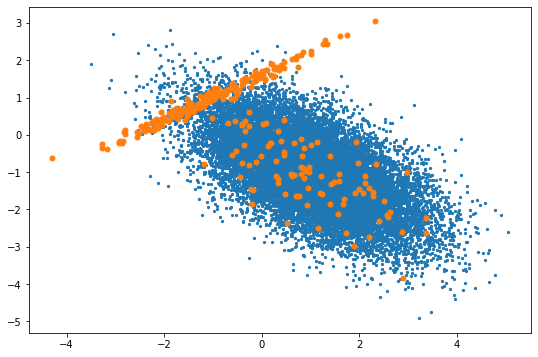

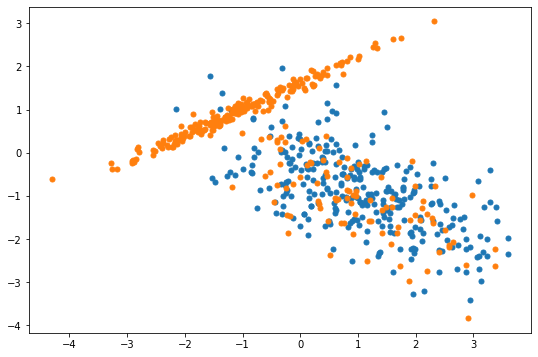

In [40]:
# new data generation

RANDOMSEED = 1

n_zero = 20000
n_one = 200
noise = 0.2



RANDOMSTATE = np.random.RandomState(RANDOMSEED)

random_seed = RANDOMSTATE.randint(0, np.iinfo(np.uint32).max)
X, y = make_classification(n_samples= n_zero + n_one,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           weights = (n_zero / (n_zero + n_one) , n_one/ (n_zero + n_one)),
                           n_clusters_per_class = 1,
                  random_state=random_seed)


# whole dataset
fig = plt.figure(figsize=(9, 6))
#plt.ylim(-1,2)
#plt.xlim(-2,3)
plt.scatter(X[y==0, 0], X[y==0, 1], color="C0", marker=".", s=20)
plt.scatter(X[y==1, 0], X[y==1, 1], color="C1", marker=".", s=100)
plt.savefig("./plot/data_classification.pdf", bbox_inches='tight')
plt.show()

# after undersampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

fig = plt.figure(figsize=(9, 6))
#plt.ylim(-1,2)
#plt.xlim(-2,3)
plt.scatter(X_resampled[y_resampled==0, 0], X_resampled[y_resampled==0, 1], color="C0", marker=".", s=100)
plt.scatter(X_resampled[y_resampled==1, 0], X_resampled[y_resampled==1, 1], color="C1", marker=".", s=100)
plt.savefig("./plot/data_classification_subsample.pdf", bbox_inches='tight')
plt.show()